# Two-Body Gravity Problem: Lagrangian Dynamics and Numerical Solution

## Problem Overview
In this project, I explore the relative motion of two bodies interacting through gravitational attraction in a two-dimensional space. This classical mechanics problem models the mutual gravitational pull between the two masses, leading to orbital-like trajectories. Using Lagrangian mechanics, I will derive the equations of motion for the system, solve them numerically, and analyze the resulting trajectories for various initial conditions.

### Assumptions and Simplifications
To simplify the problem:
- I treat both bodies as point masses, ignoring rotational effects and the size of the objects.
- The motion is restricted to two dimensions.
- No external forces act on the system, and only the internal gravitational interaction is considered.
- The center of mass (CoM) frame and relative coordinates will simplify the problem by focusing on the interaction between the two bodies.

#### Generalized Coordinates
Let  $\mathbf{r}_1 $ and $ \mathbf{r}_2 $ be the position vectors of the two masses  $m_1$  and  $m_2$  respectively in Cartesian coordinates. In polar coordinates, we can describe the relative motion of the two masses using:

- The radial distance  $r$  between the two bodies.
- The angular coordinate  $\theta$ , which describes the angle between the line connecting the two masses and a fixed reference direction.

The positions of the masses  $m_1$  and  $m_2$  in terms of the relative position vector  $\mathbf{r}$  and the center of mass  $\mathbf{R}_{\text{CoM}}$  are:
$$
\mathbf{r}1 = \mathbf{R}_{CoM} + \frac{m_2}{m_1 + m_2} \mathbf{r}
$$
$$
\mathbf{r}2 = \mathbf{R}_{CoM} - \frac{m_1}{m_1 + m_2} \mathbf{r}
$$

Where  $\mathbf{r} = r \hat{r}$  is the relative position between the two masses, and  $\hat{r}$  is the unit vector in the radial direction.

## Lagrangian
The Lagrangian $ L = T - V $ is constructed from the kinetic and potential energy of the system:

- **Kinetic Energy (T):** The total kinetic energy is the sum of the kinetic energy of both masses. In polar coordinates:
  $$
  T = \frac{1}{2} m_1 \left( \dot{r}_1^2 + r_1^2 \dot{\phi}_1^2 \right) + \frac{1}{2} m_2 \left( \dot{r}_2^2 + r_2^2 \dot{\phi}_2^2 \right)
  $$
 However, it is convenient to use the reduced mass  $\mu$  and the total mass  $M = m_1 + m_2$ , and describe the kinetic energy of the system in terms of the center-of-mass motion and the relative motion.

$$
  T_{CoM} = \frac{1}{2} (m_1 + m_2) \left( \dot{R}_{CoM}^2 \right)
$$

$$
  T_{rel} = \frac{1}{2} \mu \left( \dot{r}^2 + r^2 \dot{\phi}^2 \right)
$$
$\quad$ where $\mu = \frac {m_1 m_2}{m_1 + m_2} $. Therefore, total kinetic energy is given by:

$$
 T = T_{CoM} + T_{rel} = \frac{1}{2} (m_1 + m_2) \left( \dot{R}_{CoM}^2 \right) + \frac{1}{2} \mu \left( \dot{r}^2 + r^2 \dot{\phi}^2 \right)
$$

- **Potential Energy (V):** The potential energy is the gravitational potential energy between the two bodies:
  $$
  V = - \frac{G m_1 m_2}{\mathbf{r}}
  $$
  where $ G $ is the gravitational constant and $ \mathbf{r} $ is the distance between the two bodies.

- **Lagrangian (L):** The Lagrangian is given by $L = T - V$. Therefore,

$$
L = \frac{1}{2} (m_1 + m_2) \left( \dot{R}_{CoM}^2 \right) + \frac{1}{2} \mu \left( \dot{r}^2 + r^2 \dot{\phi}^2 \right) + \frac{G m_1 m_2}{\mathbf{r}}
$$

## Euler-Lagrange Equations
Using the Euler-Lagrange formalism, I derive the equations of motion for $ r_{rel} $ and $ r_{CoM}$. We start with $r_{CoM} since that is straightforward.$

$L_{CoM} = \frac{1}{2} (m_1 + m_2) \left( \dot{R}_{CoM}^2 \right)$. Using Euler-Lagrange, we get:

$(m_1 + m_2)\ddot{R}_{CoM} = 0$. This implies there is no motion for the center of mass, which makes sense since there is no external force on the system.

Next, we have the relative motion between the bodies. We have $L_{rel} = \frac{1}{2} \mu \left( \dot{r}^2 + r^2 \dot{\phi}^2 \right) + \frac{G m_1 m_2}{\mathbf{r}}$. It depends on two coordinates - $r$ and $\phi$. We first find the motion with respect to $r$.

$$
\frac{d}{dt} \left( \frac{\partial L_{rel}}{\partial \dot{r}} \right) - \frac{\partial L_{rel}}{\partial r} = 0
$$

$$
\ddot{r} = r \dot{\phi}^2 - \frac{Gm_1m_2}{\mu r^2} \quad \quad (1)
$$ 
which is the required equation.

Next, we look at the motion with respect to $\phi$.
$$
\frac{d}{dt} \left( \frac{\partial L_{rel}}{\partial \dot{\phi}} \right) - \frac{\partial L_{rel}}{\partial \phi} = 0
$$

$$
\frac {d}{dt} \mu r^2 \dot{\phi} = 0
$$
This is another way of saying that the angular momentum is conserved, which makes sense again since there are no external torques on the system. Taking the time derivative, we get:

$$
\ddot{\phi} = - \frac{2\dot{r}\dot{\phi}}{r} \quad \quad (2)
$$



## Numerical Solution
Using new variables, we can turn these 2nd order equations into 1st order equations to solve them numerically. 

We can write $v = \dot{r}$ and $\omega = \dot{\phi}$. Therefore, 
$$
\dot{v} = r \omega^2 - \frac{G(m_1 + m_2)}{r^2}
$$

$$
\dot{\omega} = - \frac{2v\omega}{r}
$$

In [14]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.ndimage import uniform_filter1d

In [2]:
# Constants
G = 6.67430e-11  # Gravitational constant, in m^3 kg^-1 s^-2
m1 = 5.972e24    # Mass of Earth (kg)
m2 = 7.348e22    # Mass of Moon (kg)
mu = (m1 * m2) / (m1 + m2)  # Reduced mass
M = m1 + m2  # Total mass

# Initial conditions: r(0), theta(0), r_dot(0), theta_dot(0)
r0 = 384.4e6  # Initial distance between Earth and Moon (384,400 km)
phi0 = 0.0  # Initial angular position
v= 0.0  # Radial velocity (initially zero)
omega = np.sqrt(G * M / r0) / r0  # Orbital angular velocity (moon around earth)

# Time Setup
tmax = 2.36e9  # ~ 27320 days (time span of 1000 lunar orbits)
t_span = (0, tmax)
t_eval = np.linspace(*t_span, 1000)  # 1000 time points for evaluation

In [3]:
# Define equations of motion in polar coordinates (Lagrangian-derived)
def diffyqs(t, curr_vals):
    r, phi, v, omega = curr_vals
    
    # Radial equation
    vdot = r * omega**2 - G * M / r**2
    
    # Angular equation
    omega_dot = -2 * v * omega / r
    
    return [v, omega, vdot, omega_dot]

In [4]:
initial_conditions = [r0, phi0, v, omega]

# Solve the system of differential equations
solution = solve_ivp(diffyqs, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract the solution (r and theta)
r = solution.y[0]
theta = solution.y[1]
v = solution.y[2]         # Radial velocity
omega_ = solution.y[3]     # Angular velocity

# Calculate total orbital velocity
# Tangential velocity: v_tangential = r * omega
v_tangential = r * omega_
# Total orbital velocity: v_orbital = sqrt(v_radial^2 + v_tangential^2)
v_orbital = np.sqrt(v**2 + v_tangential**2)

# Convert from polar to Cartesian coordinates for visualization
x = r * np.cos(theta)
y = r * np.sin(theta)

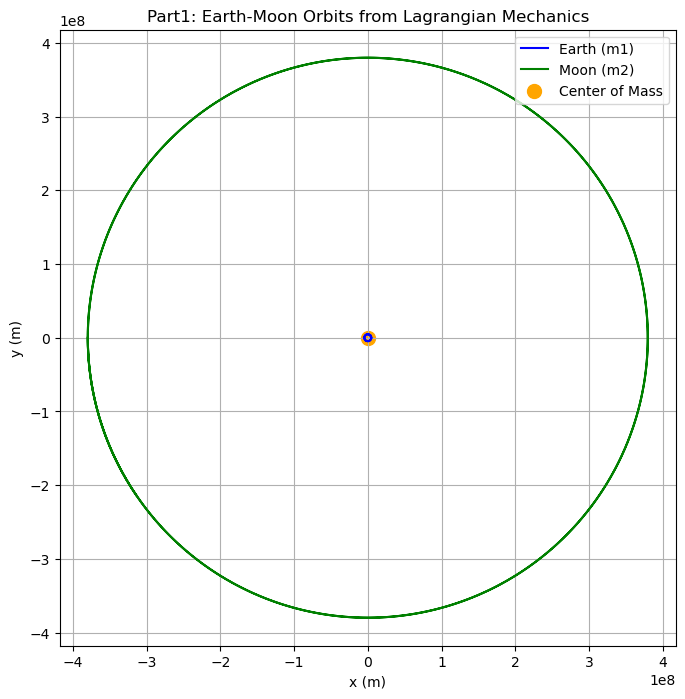

In [5]:
# Now we need to calculate the position of the two bodies in the inertial frame
# The center of mass is stationary at the origin (0, 0)
# Body 1 (Earth)'s position is (m2 / M) * r, and Body 2 (Moon)'s position is -(m1 / M) * r

x1 = (m2 / M) * x  # Earth's position
y1 = (m2 / M) * y
x2 = -(m1 / M) * x  # Moon's position
y2 = -(m1 / M) * y

# Plot the orbits
plt.figure(figsize=(8, 8))
plt.plot(x1, y1, label='Earth (m1)', color='blue')
plt.plot(x2, y2, label='Moon (m2)', color='green')
plt.scatter(0, 0, color='orange', label='Center of Mass', s=100)
plt.title('Part1: Earth-Moon Orbits from Lagrangian Mechanics')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')  # Set equal scaling for x and y axes
plt.show()

This resembles the standard Earth-Moon orbit. Now let's see what happens when we adjust the two masses so they are equal to one another. Let's set them both equal to the mass of the moon. The starting distance remains te same. We will add a small radial velocity (otherwise the orbits just overlap each other).

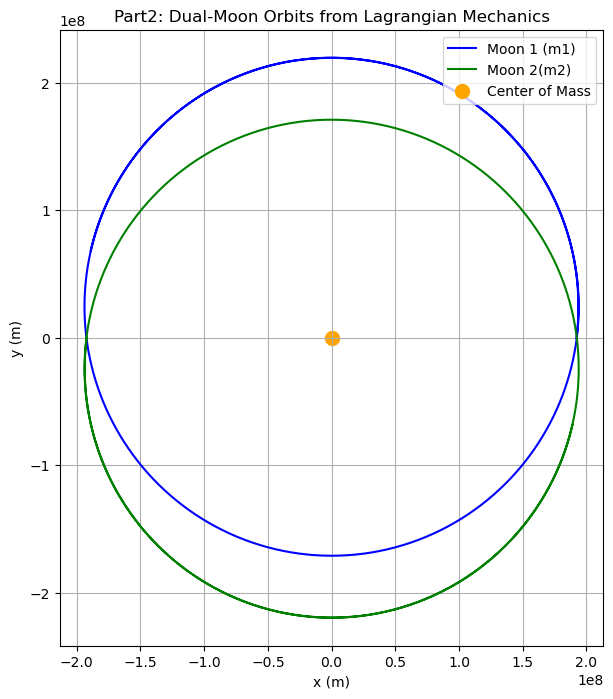

In [19]:
# Constants
m2 = 7.348e22    # Mass of Moon (kg)
m1 = m2
mu = (m1 * m2) / (m1 + m2)  # Reduced mass
M = m1 + m2  # Total mass

# Initial conditions: r(0), theta(0), r_dot(0), theta_dot(0)
r0 = 384.4e6  # Initial distance between Moon 1 and Moon 2 (384,400 km)
v= 20  # Radial velocity 
omega = np.sqrt(G * M / r0) / r0  # Orbital angular velocity (moon around earth)

initial_conditions = [r0, phi0, v, omega]

# Time Setup
tmax = 2.36e7 # ~ 273.2 days (time span of 10 lunar orbit)
t_span = (0, tmax)
t_eval = np.linspace(*t_span, 1000)  # 1000 time points for evaluation

# Solve the system of differential equations
solution = solve_ivp(diffyqs, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract the solution (r and theta)
r = solution.y[0]
theta = solution.y[1]

# Convert from polar to Cartesian coordinates for visualization
x = r * np.cos(theta)
y = r * np.sin(theta)

# Now we need to calculate the position of the two bodies in the inertial frame
# The center of mass is stationary at the origin (0, 0)
# Body 1 (Earth)'s position is (m2 / M) * r, and Body 2 (Moon)'s position is -(m1 / M) * r

x1 = (m2 / M) * x  # Mass 1 position
y1 = (m2 / M) * y
x2 = -(m1 / M) * x  # Moon's position
y2 = -(m1 / M) * y

# Plot the orbits
plt.figure(figsize=(10, 8))
plt.plot(x1, y1, label='Moon 1 (m1)', color='blue')
plt.plot(x2, y2, label='Moon 2(m2)', color='green')
plt.scatter(0, 0, color='orange', label='Center of Mass', s=100)
plt.title('Part2: Dual-Moon Orbits from Lagrangian Mechanics')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(loc='upper right')
plt.grid(True)
plt.gca().set_aspect('equal')  # Set equal scaling for x and y axes
plt.show()

As expected, the two equal mass-ed moons continue to orbit around the center of mass. The moons follow circular orbits around the center of mass. Since both moons have equal mass, their orbits are symmetric with respect to the center of mass.
The equal mass of the moons results in symmetric orbits about the center of mass. Each moon’s path is a reflection of the other across the center of mass.


## Approximate Solutions
Gravitational orbits cannot oscillate like harmonic oscillators since gravity is not a restorative force. It is simply attractive. If there is a perturbation of the Moon towards the Earth, it will begin falling towards it. Conversely, if it is pushed back a bit, it will start receding away from the Earth. For this section, we can then visualize this drift when a small perturbation is added. We can then compare the orbital velocities of the moon and how they change with time for the perturbed and unperturbed scenarios.

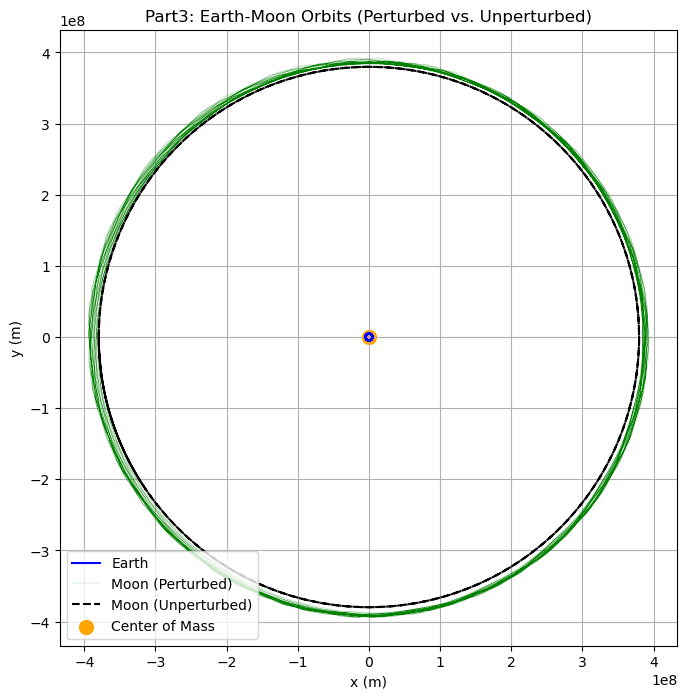

In [8]:
# Constants
G = 6.67430e-11  # Gravitational constant, in m^3 kg^-1 s^-2
m1 = 5.972e24    # Mass of Earth (kg)
m2 = 7.348e22    # Mass of Moon (kg)
mu = (m1 * m2) / (m1 + m2)  # Reduced mass
M = m1 + m2  # Total mass

# Initial conditions: r(0), theta(0), r_dot(0), theta_dot(0)
r0 = 384.4e6  # Initial distance between Earth and Moon (384,400 km)
phi0 = 0.0  # Initial angular position
v= 0.0  # Radial velocity (initially zero)
omega = np.sqrt(G * M / r0) / r0  # Orbital angular velocity (moon around earth)

delta_r = 2e6 # Moon gets pushed back from its starting position

# Time Setup
tmax = 2.36e9  # ~ 27320 days (time span of 1000 lunar orbits)
t_span = (0, tmax)
t_eval = np.linspace(*t_span, 1000)  # 1000 time points for evaluation

initial_conditions_delta = [r0 + delta_r, phi0, v, omega]
initial_conditions = [r0, phi0, v, omega]
# Solve the system of differential equations
solution_delta = solve_ivp(diffyqs, t_span, initial_conditions_delta, t_eval=t_eval, method='RK45')
solution = solve_ivp(diffyqs, t_span, initial_conditions, t_eval=t_eval, method='RK45')
# Extract the solution (r and theta)
r_delta = solution_delta.y[0]
theta_delta = solution_delta.y[1]
v_delta = solution_delta.y[2]         # Radial velocity
omega_delta = solution_delta.y[3]     # Angular velocity

r = solution.y[0]
theta = solution.y[1]
x = r * np.cos(theta)
y = r * np.sin(theta)

x1 = (m2 / M) * x  # Mass 1 position
y1 = (m2 / M) * y
x2 = -(m1 / M) * x  # Moon's position
y2 = -(m1 / M) * y
# Calculate total orbital velocity
# Tangential velocity: v_tangential = r * omega
v_tangential_delta = r_delta * omega_delta
# Total orbital velocity: v_orbital = sqrt(v_radial^2 + v_tangential^2)
v_orbital_delta = np.sqrt(v_delta**2 + v_tangential_delta**2)

# Convert from polar to Cartesian coordinates for visualization
x_prime = r_delta * np.cos(theta_delta)
y_prime = r_delta * np.sin(theta_delta)

# Now we need to calculate the position of the two bodies in the inertial frame
# The center of mass is stationary at the origin (0, 0)
# Body 1 (Earth)'s position is (m2 / M) * r, and Body 2 (Moon)'s position is -(m1 / M) * r

x1_prime = (m2 / M) * x_prime  # Earth's position
y1_prime = (m2 / M) * y_prime
x2_prime= -(m1 / M) * x_prime  # Moon's position
y2_prime = -(m1 / M) * y_prime

x2 = -(m1 / M) * x  # Moon's position
y2 = -(m1 / M) * y

# Plot the orbits
plt.figure(figsize=(16, 8))
plt.plot(x1_prime, y1_prime, label='Earth', color='blue')
plt.plot(x2_prime, y2_prime, label='Moon (Perturbed)', color='green', linewidth=0.1)
plt.plot(x2, y2, label='Moon (Unperturbed)', linestyle='--', color='black')
plt.scatter(0, 0, color='orange', label='Center of Mass', s=100)
plt.title('Part3: Earth-Moon Orbits (Perturbed vs. Unperturbed)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')  # Set equal scaling for x and y axes
plt.show()

We see the Moon's orbit slowly drifting away as time goes on. This is the drift recorded when a slight perturbation of 1000km is added, which is around 0.6% the size of the radius of the orbit. We can also visualize how the orbital velocity of the moon changes over time.

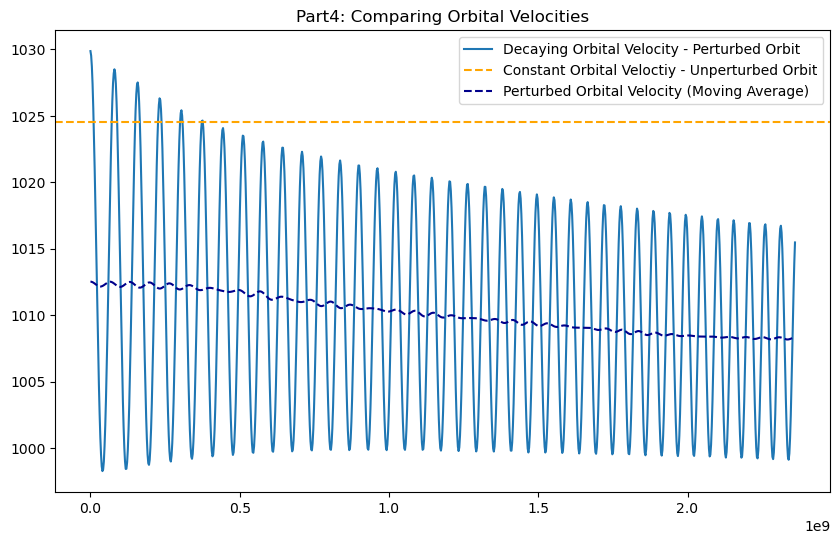

In [20]:
# Apply moving average for smoothing
window_size = 500  # Define window size for moving average
v_orbital_smooth = uniform_filter1d(v_orbital_delta, size=window_size)

plt.figure(figsize=(10, 6))
plt.plot(solution_delta.t, v_orbital_delta, label='Decaying Orbital Velocity - Perturbed Orbit')
plt.axhline(v_orbital[0], label='Constant Orbital Veloctiy - Unperturbed Orbit', color='orange', linestyle='--')
plt.plot(solution_delta.t, v_orbital_smooth, linestyle='--', color='darkblue', label='Perturbed Orbital Velocity (Moving Average)')
plt.title('Part4: Comparing Orbital Velocities')
plt.legend()

The horizontal line represents the orbital velocity of the undisturbed circular orbit. As expected, it stays constant and follows the orbital velocity formula, given by $v_o = \sqrt{\frac{GM}{R}}$. On the other hand, for the perturbed orbit, we saw that the orbit gets pushed back slightly as time goes on. Going by the formula, we can see that orbital velocity is inversely proportional to the distance of the orbit. As this distance increases, the average orbital velocity keeps going down. Since the orbit is not perfectly circular anymore, we also the orbital velocity oscillating.

## Credits

- The idea of the problem was taken from the orbital problem section of the Week 2 activity - Calculus of variations and Lagrangian Dynamics. I decided to expand on the problem by not assuming one mass would stay stationary.

- The diffyeqs function was taken from another Week 2 activity - Numerical integration and more Lagrangians. I modified the working of the function to reflect the Lagrangian I calculated.

- I refered to this text on the Two-Body Problem provided by UC Santa Barbara: https://web.physics.ucsb.edu/~fratus/phys103/LN/TBP.pdf This text helped flesh out the Lagrangians I built and the subsequent equations of motion obtained.